In [3]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('data_jobs.csv')

In [6]:
dataset

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [7]:
dataset.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [8]:
dataset.tail(2)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,NaN,NaN,NaN,Trigyn,"['aws', 'flow']","{'cloud': ['aws'], 'other': ['flow']}"


In [15]:
dataset.iloc[0:4,3:6]

,job_via,job_schedule_type,job_work_from_home
0,via Work Nearby,Full-time,False
1,via BeBee México,Full-time,False
2,via LinkedIn,Full-time,False
3,via Diversity.com,Full-time,False


In [20]:
dataset.loc[:,'job_via']

0                   via Work Nearby
1                  via BeBee México
2                      via LinkedIn
3                 via Diversity.com
4                via Clearance Jobs
                    ...            
785736          melalui Trabajo.org
785737    melalui BeBee Deutschland
785738             melalui Ricebowl
785739          melalui Recruit.net
785740               melalui Trigyn
Name: job_via, Length: 785741, dtype: object

In [21]:
dataset['job_posted_date']=pd.to_datetime(dataset['job_posted_date'])

In [22]:
dataset['job_skills'] = dataset['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [23]:
df_india = (dataset['job_country']=='India') & (dataset['job_title']=='Data Analyst')

In [24]:
df_india

0         False
1         False
2         False
3         False
4         False
          ...  
785736    False
785737    False
785738    False
785739    False
785740    False
Length: 785741, dtype: bool

In [25]:
df_india = dataset[(dataset['job_country']=='India') & (dataset['job_title']=='Data Analyst')]

In [26]:
df_india

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,NaN,NaN,NaN,Fusion Plus Solutions Inc,[sql],{'programming': ['sql']}
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,NaN,NaN,NaN,QuEST Global Services Pte. Ltd,"[python, sql, excel, ms access, powerpoint]","{'analyst_tools': ['excel', 'ms access', 'powe..."
504,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via Shine,Full-time,False,India,2023-11-12 13:08:06,True,False,India,NaN,NaN,NaN,HSBC,"[sql, nosql, python, r, mysql, sql server, pos...","{'analyst_tools': ['qlik', 'tableau', 'power b..."
691,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-09-12 13:14:38,True,False,India,NaN,NaN,NaN,AOS,NaN,NaN
1399,Data Analyst,Data Analyst,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-07-04 13:13:00,True,False,India,NaN,NaN,NaN,Infosys BPM,"[sql, shell, r, bigquery, pandas, linux, excel...","{'analyst_tools': ['excel', 'tableau', 'qlik']..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784845,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-25 06:14:59,True,False,India,NaN,NaN,NaN,Capgemini,"[sql, visio]","{'analyst_tools': ['visio'], 'programming': ['..."
785157,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Full-time,False,India,2023-01-31 06:11:12,False,False,India,NaN,NaN,NaN,ARYAN TECHNOLOGY,"[sql, javascript, sas, sas, excel, spss]","{'analyst_tools': ['sas', 'excel', 'spss'], 'p..."
785515,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-09-01 06:17:34,False,False,India,year,105000.0,NaN,Myntra,NaN,NaN
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,NaN,NaN,NaN,Artech L.L.C.,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."


In [30]:
df_india['job_location'].value_counts()

job_location
India                                    531
Hyderabad, Telangana, India              303
Anywhere                                 202
Bengaluru, Karnataka, India              100
Maharashtra, India                        65
Mumbai, Maharashtra, India                48
Pune, Maharashtra, India                  38
Gurugram, Haryana, India                  34
Chennai, Tamil Nadu, India                32
New Delhi, Delhi, India                   22
Indore, Madhya Pradesh, India             22
Secunderabad, Telangana, India            19
Bhopal, Madhya Pradesh, India             16
Nagpur, Maharashtra, India                15
Noida, Uttar Pradesh, India               14
Telangana, India                          10
Raipur, Chhattisgarh, India                5
Navi Mumbai, Maharashtra, India            5
Madhya Pradesh, India                      4
Jaipur, Rajasthan, India                   4
West Bengal                                3
Maharashtra                               

In [31]:
df_india['job_location'].value_counts().head(10)

job_location
India                          531
Hyderabad, Telangana, India    303
Anywhere                       202
Bengaluru, Karnataka, India    100
Maharashtra, India              65
Mumbai, Maharashtra, India      48
Pune, Maharashtra, India        38
Gurugram, Haryana, India        34
Chennai, Tamil Nadu, India      32
New Delhi, Delhi, India         22
Name: count, dtype: int64

In [38]:
plot = df_india['job_location'].value_counts().head(10).to_frame()

In [39]:
plot

,count
job_location,
India,531
"Hyderabad, Telangana, India",303
Anywhere,202
"Bengaluru, Karnataka, India",100
"Maharashtra, India",65
"Mumbai, Maharashtra, India",48
"Pune, Maharashtra, India",38
"Gurugram, Haryana, India",34
"Chennai, Tamil Nadu, India",32


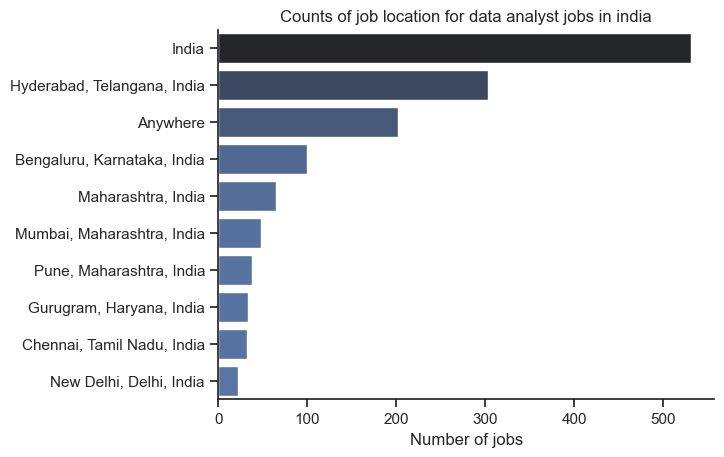

In [48]:
sns.set_theme(style='ticks')
sns.barplot(data=plot,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of job location for data analyst jobs in india')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()


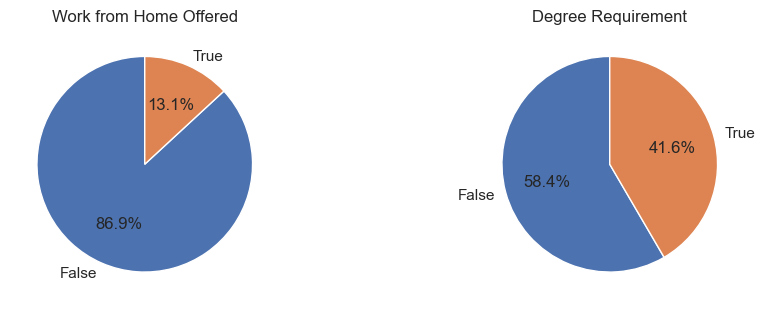

In [51]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
}

fig, ax = plt.subplots(1, 2, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_india[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

In [53]:
df=df_india['company_name'].value_counts().head(10).to_frame()



In [54]:
df

,count
company_name,
S&P Global,33
Confidential,21
Virtusa,12
Recruin,12
intellijobs,11
AKS ProTalent,10
V5 Global Services Private Limited.,9
Indium Software,9
Wipro,9


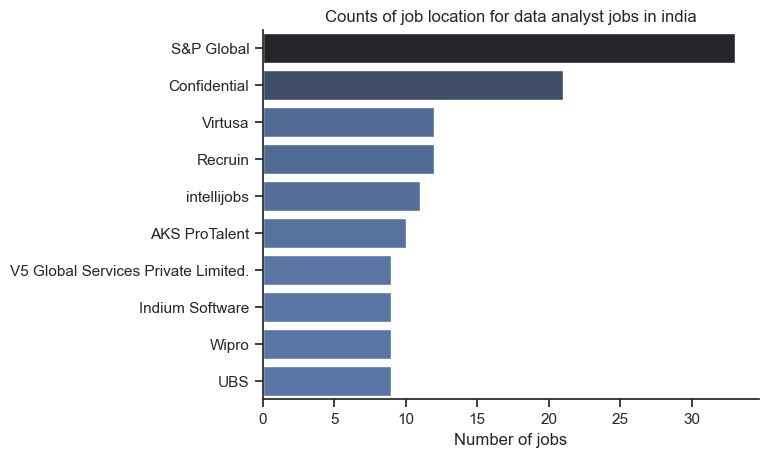

In [57]:
sns.set_theme(style='ticks')
sns.barplot(data=df,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of job location for data analyst jobs in india')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()